In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import streamlit as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
 

In [2]:
# Reading and Exploring the data set 
df=pd.read_csv("C:\\Users\\PMLS\\Downloads\\archive (8)\\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Checking Null Values in the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Stats Summarizton Of The data set 
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Removinng Irrelevant Columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
# We have renamed the Column and Mapped the column for better Understanding

encoded_columns={0:'No',1:"Yes"}
df['Churn']=df['Exited'].map(encoded_columns)

Text(0.5, 1.0, 'Gender Wise Churn')

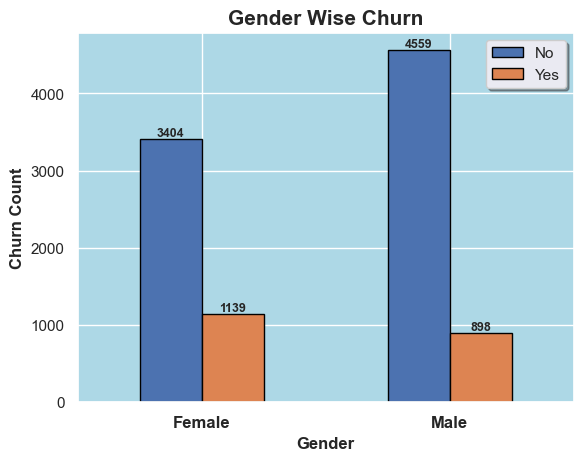

In [7]:
# Visualize a Bar Chart To See Which Gender have greater Churn number
sns.set()
ax=pd.crosstab(df['Gender'],df['Churn']).plot(kind='bar',edgecolor='black')
for bars in ax.containers:
    ax.bar_label(bars,fontweight='bold',fontsize=9)
ax.set_facecolor('lightblue')

plt.legend(shadow=True)
plt.xticks(rotation=0,fontsize=12,fontweight='bold')
plt.xlabel("Gender",fontsize=12,fontweight='bold')
plt.ylabel("Churn Count",fontsize=12,fontweight='bold')
plt.title("Gender Wise Churn",fontsize=15,fontweight='bold')

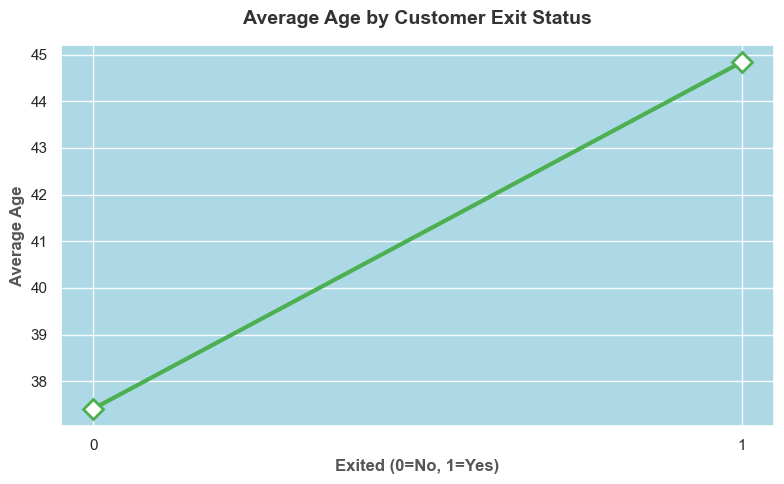

In [8]:
# Checking Gender Average Age For Getting churn
sns.set()
ax = df.groupby(['Exited'])['Age'].mean().plot(
    kind='line',
    figsize=(8, 5),
    marker='D',              # Diamond markers
    markersize=10,           # Slightly larger markers
    linewidth=3,             # Thicker line
    color=['#4CAF50', '#FF5722'],  # Green and orange colors
    markerfacecolor='white', # White fill for markers
    markeredgewidth=2        # Marker border thickness
)
ax.set_facecolor('lightblue')
# Add titles and labels with colorful text
plt.title('Average Age by Customer Exit Status', 
          fontsize=14, pad=15, color='#333333',fontweight='bold')
plt.xlabel('Exited (0=No, 1=Yes)', fontsize=12, color='#555555',fontweight='bold')
plt.ylabel('Average Age', fontsize=12, color='#555555',fontweight='bold')
plt.xticks([0, 1])

# Colorful grid
plt.grid(linestyle='-', alpha=0.9, color='white')

# Colorful spines
#ax.spines['bottom'].set_color('#888888')
#ax.spines['left'].set_color('#888888')

plt.tight_layout()
plt.show()

In [9]:
# Cheking The Tenure With the of Customer
df.groupby('Exited')[["Tenure"]].mean().reset_index()

,Exited,Tenure
0,0,5.033279
1,1,4.932744


In [10]:
# Checking Mean
#  Of Products Bought
df.groupby('Exited')[['NumOfProducts']].mean()

,NumOfProducts
Exited,
0,1.544267
1,1.475209


In [11]:
# Geography Wise and Gender Wise  Age Mean 
df.groupby(['Exited','Geography','Gender'])[['Age']].mean()

Age
Exited Geography Gender           
0      France    Female  37.098834
                 Male    37.338743
       Germany   Female  37.343624
                 Male    37.286316
       Spain     Female  38.011655
                 Male    37.716418
1      France    Female  45.332609
                 Male    44.871429
       Germany   Female  44.828125
                 Male    44.975410
       Spain     Female  43.610390
                 Male    44.829670

In [12]:
# Converting Categorical Column Into Numeric Column For Modeling Purpose 
df['Gender']=df['Gender'].apply(lambda x: 1 if x=="Female"  else 0)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
0,619,France,1,42,2,0.00,1,1,1,101348.88,1,Yes
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,No
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1,Yes
3,699,France,1,39,1,0.00,2,0,0,93826.63,0,No
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,No


In [13]:
# Spliting The Data 
y=df['Exited']
X=df.drop(columns=['Churn','Exited'])

In [14]:
# Converting Categorical Data Into Numeric Form
X['Geography']=X['Geography'].apply(lambda x: 1 if x=='France' else(2 if x=='Spain' else 3))
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,1,42,2,0.00,1,1,1,101348.88
1,608,2,1,41,1,83807.86,1,0,1,112542.58
2,502,1,1,42,8,159660.80,3,1,0,113931.57
3,699,1,1,39,1,0.00,2,0,0,93826.63
4,850,2,1,43,2,125510.82,1,1,1,79084.10


In [15]:
# Splitting the data into training and testing set 
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.30,random_state=42)


In [16]:
# Scaling the data 
scalar=StandardScaler()
x_scaled=scalar.fit_transform(X_train)
x_scaled

array([[-0.34459497,  0.30420891,  1.09823226, ...,  0.64598061,
         0.97071435,  1.24821373],
       [-0.09518109,  1.51138712,  1.09823226, ..., -1.54803408,
         0.97071435,  1.52122527],
       [-0.94734518, -0.9029693 , -0.91055421, ..., -1.54803408,
        -1.03016917,  1.2636148 ],
       ...,
       [ 0.86090545, -0.9029693 ,  1.09823226, ..., -1.54803408,
        -1.03016917, -0.14925893],
       [ 0.15423279, -0.9029693 , -0.91055421, ...,  0.64598061,
        -1.03016917, -0.05754351],
       [ 0.46600014,  1.51138712, -0.91055421, ...,  0.64598061,
         0.97071435, -0.81942612]])

In [17]:
# Converting Scaled Data Array into Data Frame
X_scaled_df=pd.DataFrame(x_scaled,columns=['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])
X_scaled_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.344595,0.304209,1.098232,-0.656750,-0.342170,1.583725,0.819663,0.645981,0.970714,1.248214
1,-0.095181,1.511387,1.098232,-0.466380,0.698162,1.344106,-0.903352,-1.548034,0.970714,1.521225
2,-0.947345,-0.902969,-0.910554,-0.561565,0.351385,-1.222055,0.819663,-1.548034,-1.030169,1.263615
3,-0.354987,1.511387,-0.910554,0.199916,1.044940,-0.618965,-0.903352,0.645981,0.970714,1.646839
4,0.642668,-0.902969,-0.910554,-0.180824,1.391718,1.152808,0.819663,-1.548034,0.970714,0.875112


In [18]:
# Saving the Scalar 
import joblib
joblib.dump(scalar,'scalar.pkl')

['scalar.pkl']

In [19]:
# Scaling the X Test Data
X_test_Scaled=scalar.fit_transform(X_test)
X_test_Scaled_df=pd.DataFrame(X_test_Scaled,columns=['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])
X_test_Scaled_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.520142,1.493307,-0.916783,-0.667710,-0.712482,0.322306,0.780431,-1.547147,-1.031840,-0.990581
1,-0.243282,-0.901732,-0.916783,0.385561,-1.399654,-1.234784,0.780431,0.646351,0.969143,0.840374
2,-0.468871,0.295787,1.090771,0.481313,-0.368896,-1.234784,0.780431,0.646351,-1.031840,-0.696956
3,-1.443009,1.493307,-0.916783,1.917592,1.005446,0.683655,0.780431,0.646351,0.969143,1.265774
4,-0.889289,0.295787,1.090771,-1.146469,0.661861,0.777746,-0.931041,0.646351,0.969143,0.285271


LOGISTIC REGRESSION

In [20]:
# Model Creation
def Model1(X_train,Y_train,X_test):
   model=LogisticRegression()
   model.fit(X_train,Y_train)
   y_pred =model.predict(X_test)
   return y_pred
#'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
 #      'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
logistic_regression=Model1(X_train,Y_train,X_test)
logistic_regression

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
def model_performance(predictions):
    print("Accuracy Score of model {}".format(accuracy_score(Y_test,predictions)))

model_performance(logistic_regression)

Accuracy Score of model 0.8016666666666666


K NEAREST NEIGHBORS

In [22]:
def Model2(param_grid):
  grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
  grid_search.fit(X_train,Y_train)
  print(grid_search.best_params_)
  y_pred1=grid_search.predict(X_test)
  return y_pred1

In [23]:
param_grid={
    'n_neighbors':[3,5,7,9,11],
    'weights':['uniform','distance']
}
knn=Model2(param_grid)
knn

{'n_neighbors': 11, 'weights': 'uniform'}


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [24]:
model_performance(knn)

Accuracy Score of model 0.7956666666666666


Random Forest Classifier

In [37]:
rfc=RandomForestClassifier(random_state=42)
param_grid1={
    'n_estimators':[10,50,100],
    'max_features':[2,3,4,5,6,7,8,9,10],
    'bootstrap':[True,False]
}
grd_search=GridSearchCV(rfc,param_grid1,cv=5,scoring='accuracy')


In [38]:
grd_search.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [39]:
print("Best Parammeter:",grd_search.best_params_)
print("Best Accuracy:",grd_search.best_score_)

Best Parammeter: {'bootstrap': True, 'max_features': 4, 'n_estimators': 100}
Best Accuracy: 0.8604285714285715


In [40]:
y_pred1=grd_search.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
model_performance(y_pred1)

Accuracy Score of model 0.8663333333333333


In [42]:
best_model=grd_search.best_estimator_
joblib.dump(best_model,"Model.pkl")

['Model.pkl']

In [36]:
X_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')